
# Text Analysis on 20 newsgroups dataset using a Naive Bayes Classifier
## References:
## http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html
## http://www.dcs.gla.ac.uk/~srogers/firstcourseml/matlab/chapter5/newspred.html

## Load the 20 newsgroup dataset

In [2]:
from sklearn.datasets import fetch_20newsgroups

# Load the dataset
# Training set
data_train = fetch_20newsgroups(subset='train',
                            shuffle=True, random_state=42,
                            remove=('header', 'footer', 'quotes'))

# Test set
data_test = fetch_20newsgroups(subset='test',
                              shuffle=True, random_state=42,
                              remove=('header', 'footer', 'quotes'))

## Creating a pipeline for the classifier

In [3]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

# Pipeline features - vectorizer -> transformer -> classifier
# CountVectorizer - Text Preprocessing, tokenizing, and filtering of stopwords - dictionary of feature indices
# TfidfTransformer - Term frequencies, and downscaling weights for words - tf and tf-idf
# MultinomialNB - Naive Bayes Classifier - multinomial variant classifier

text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', MultinomialNB(),
                     )])

## Parameter tuning using grid search

In [4]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'vect__ngram_range': [(1, 1), (1, 2)],
    'tfidf__use_idf': (True, False),
    'clf__alpha':(1e-3, 1e-2, 1e-1, 1, 2),
}

In [5]:
gs_clf = GridSearchCV(text_clf, parameters, n_jobs=-1)

In [6]:
gs_clf.fit(data_train.data, data_train.target)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...inear_tf=False, use_idf=True)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'vect__ngram_range': [(1, 1), (1, 2)], 'tfidf__use_idf': (True, False), 'clf__alpha': (0.001, 0.01, 0.1, 1, 2)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [7]:
gs_clf.best_score_

0.85672617995403921

In [8]:
gs_clf.best_params_

{'clf__alpha': 0.001, 'tfidf__use_idf': True, 'vect__ngram_range': (1, 2)}

In [9]:
gs_clf.best_estimator_

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), preprocessor=None, stop_words=None,
        strip...ear_tf=False, use_idf=True)), ('clf', MultinomialNB(alpha=0.001, class_prior=None, fit_prior=True))])

## Evaluation of performance on test set

In [10]:
import numpy as np

y_pred = gs_clf.best_estimator_.predict(data_test.data)
np.mean(y_pred == data_test.target)

0.78770578863515661

## Analysis and Reports

### Graphical Representation of predicitive probabilities for the classifier

In [60]:
# Get probabilities for test data
test_p = gs_clf.predict_proba(data_test.data)

* TODO - Each column needs to be ordered by the true class

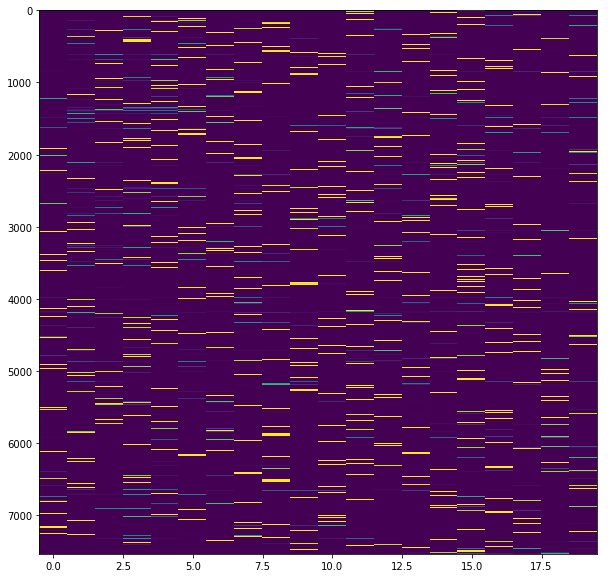

In [61]:
# Plot the probabilities
# TODO each column needs to be ordered by true class
plt.figure(figsize=(10, 10))
plt.imshow(test_p, aspect='auto')
plt.show()

### Classification Report

In [11]:
# Detailed analysis
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(data_test.target, y_pred,
                     target_names=data_test.target_names))

                          precision    recall  f1-score   support

             alt.atheism       0.76      0.73      0.74       319
           comp.graphics       0.68      0.71      0.70       389
 comp.os.ms-windows.misc       0.68      0.56      0.61       394
comp.sys.ibm.pc.hardware       0.61      0.71      0.66       392
   comp.sys.mac.hardware       0.76      0.80      0.78       385
          comp.windows.x       0.81      0.77      0.79       395
            misc.forsale       0.85      0.81      0.83       390
               rec.autos       0.82      0.85      0.83       396
         rec.motorcycles       0.91      0.91      0.91       398
      rec.sport.baseball       0.91      0.86      0.88       397
        rec.sport.hockey       0.90      0.93      0.91       399
               sci.crypt       0.81      0.88      0.84       396
         sci.electronics       0.73      0.67      0.70       393
                 sci.med       0.81      0.77      0.79       396
         

### Confusion Matrix

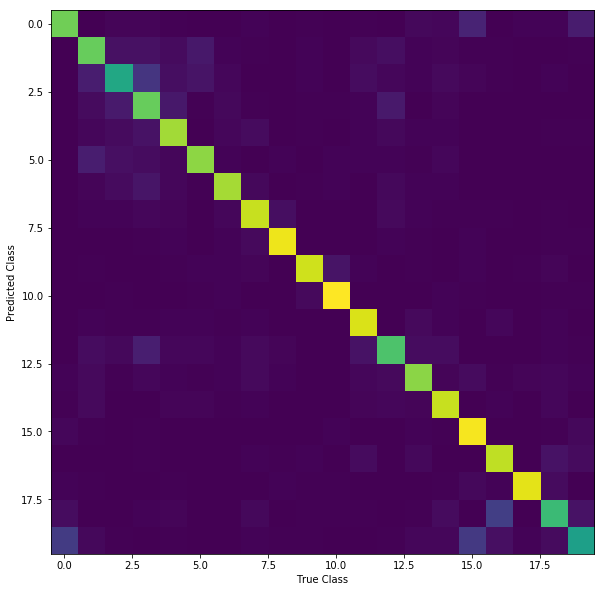

In [12]:
# Reference
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
import matplotlib.pyplot as plt

conf_mx = confusion_matrix(data_test.target, y_pred)
# Normalize
conf_mx_norm = conf_mx.astype('float') / conf_mx.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(10, 10))
plt.imshow(conf_mx_norm)
plt.xlabel('True Class')
plt.ylabel('Predicted Class')
plt.show()

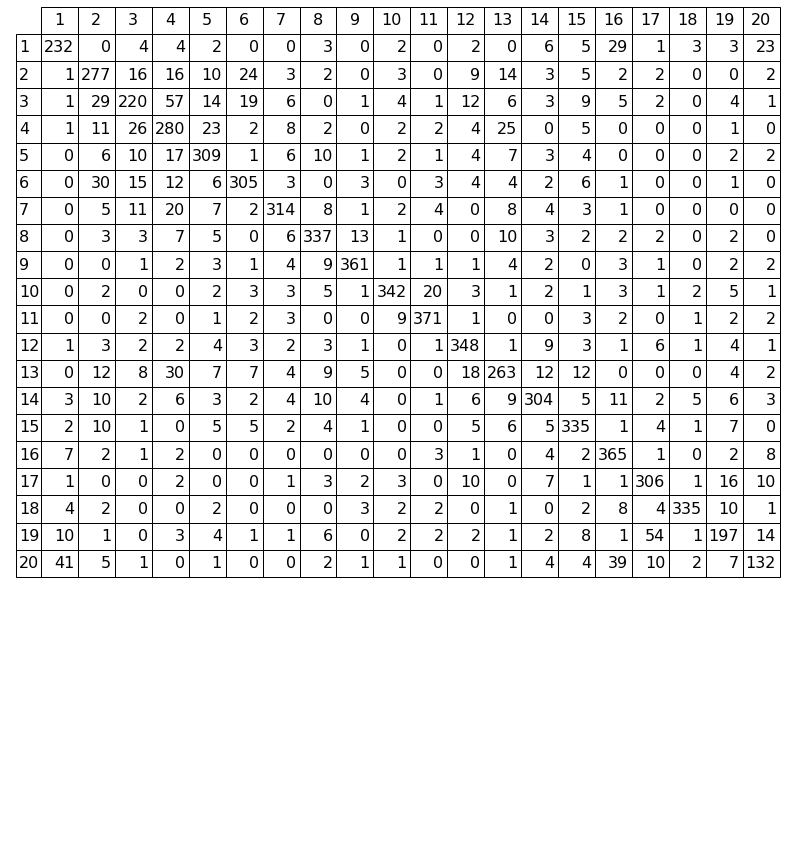

In [13]:
fig, axes = plt.subplots()

axes.axis('tight')
axes.axis('off')
rows_columns = ['%d' % (x + 1) for x in range(20)]
data = conf_mx.tolist()

cell_text = []
for row in data:
    cell_text.append(['%d' % x for x in row])

the_table = axes.table(cellText=cell_text, rowLabels=rows_columns, colLabels=rows_columns, loc='top')
the_table.set_fontsize(22)
the_table.scale(2, 2)
fig.tight_layout()
plt.show()